In [10]:
import feature_engine.encoding
import feature_engine.pipeline
import feature_engine.selection
import feature_engine.wrappers
import pandas
import pycaret.regression as regression
import sklearn.preprocessing

In [2]:
train_df = pandas.read_csv("train.csv")
train_df

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188528,188528,Cadillac,Escalade ESV Platinum,2017,49000,Gasoline,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Beige,None reported,Yes,27500
188529,188529,Mercedes-Benz,AMG C 43 AMG C 43 4MATIC,2018,28600,Gasoline,385.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes,30000
188530,188530,Mercedes-Benz,AMG GLC 63 Base 4MATIC,2021,13650,Gasoline,469.0HP 4.0L 8 Cylinder Engine Gasoline Fuel,7-Speed A/T,White,Black,None reported,Yes,86900
188531,188531,Audi,S5 3.0T Prestige,2022,13895,Gasoline,3.0L,1-Speed Automatic,Daytona Gray Pearl Effect,Black,None reported,NaN,84900


In [3]:
import sweetviz

                                             |                                             | [  0%]   00:00 ->…


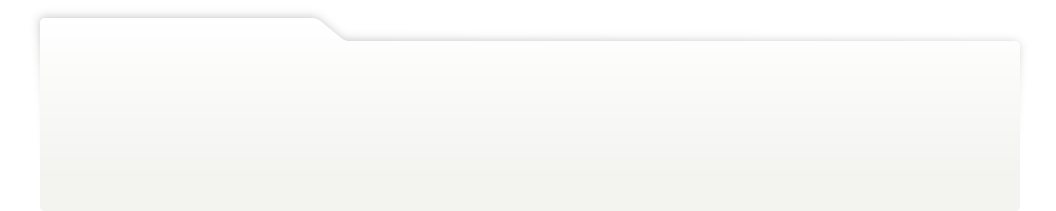
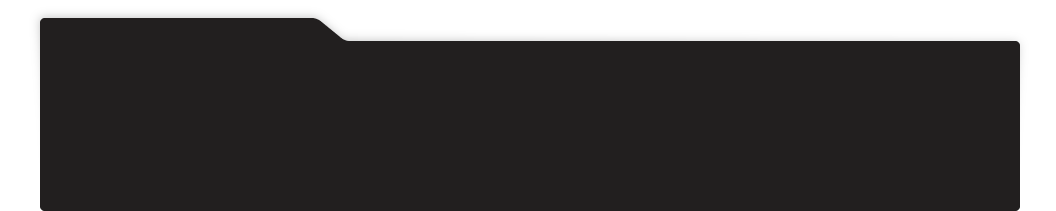
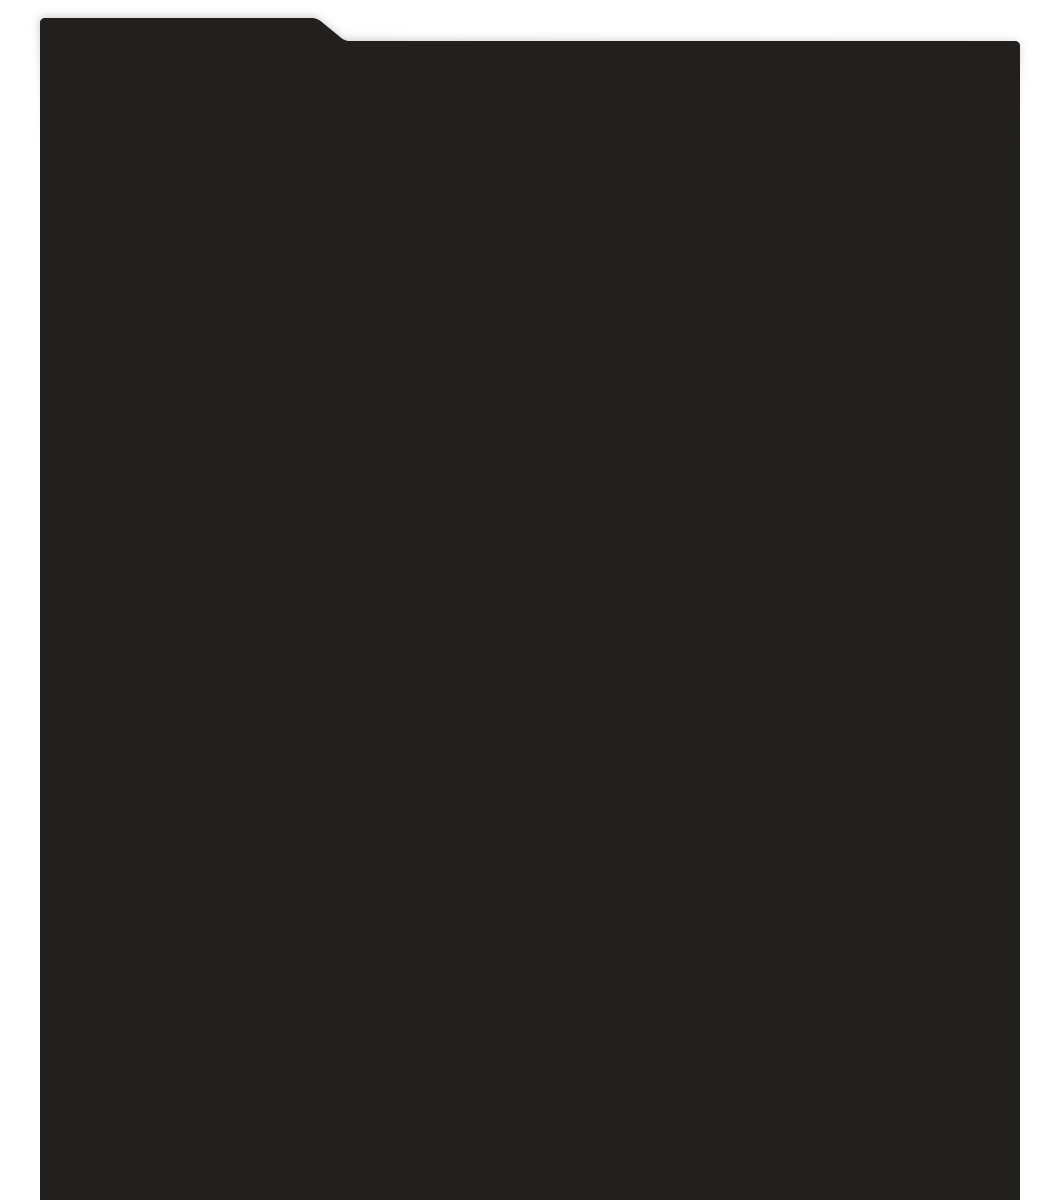
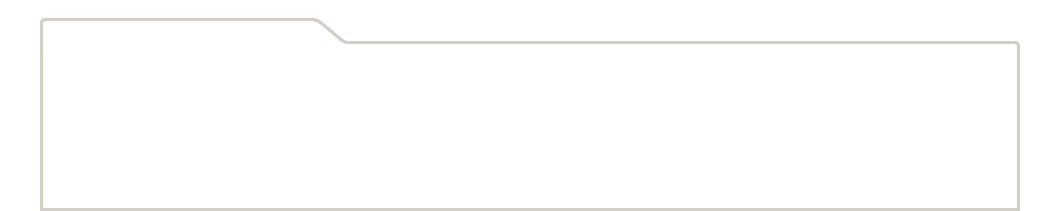
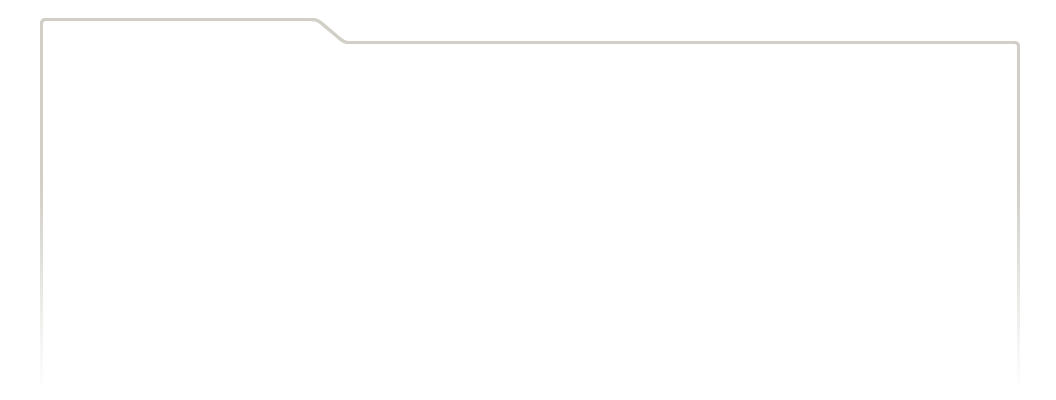
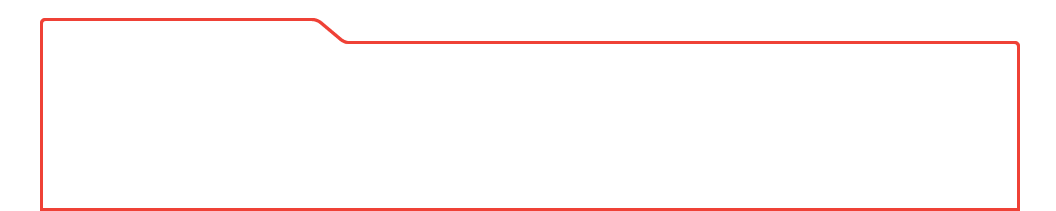
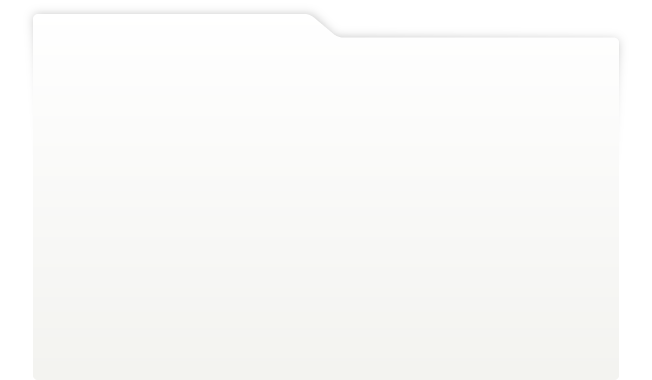
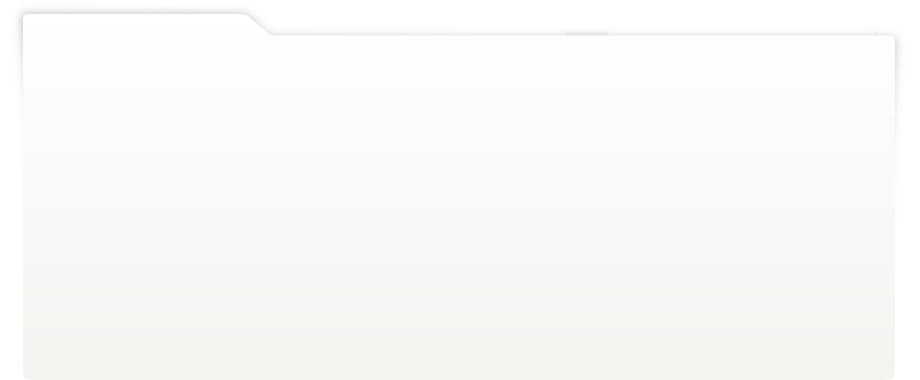
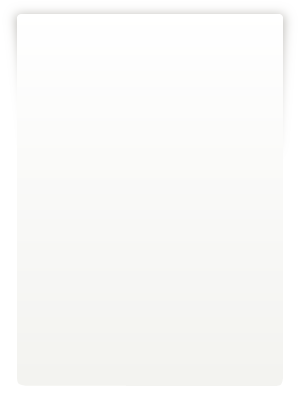
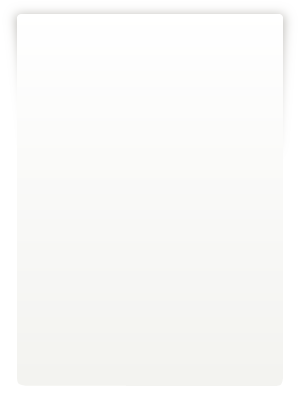
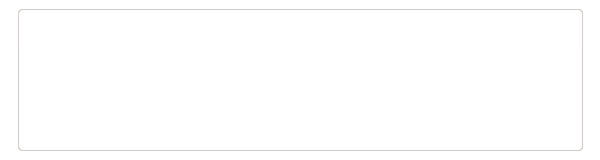
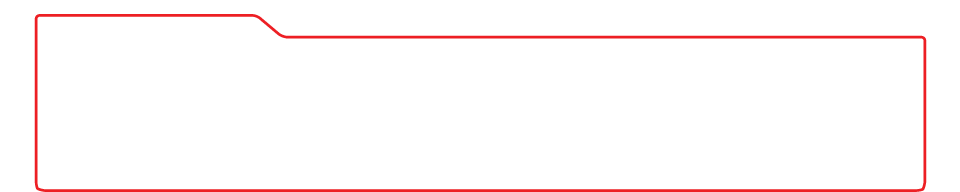
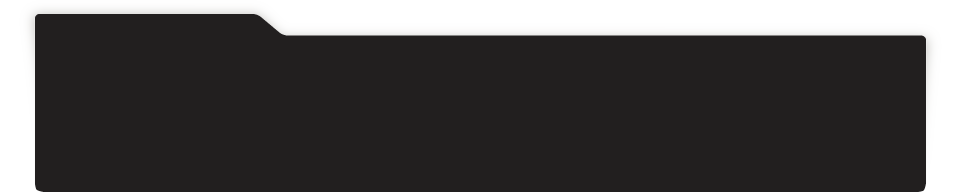
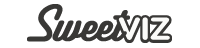
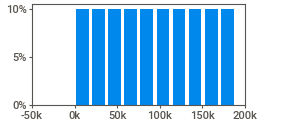
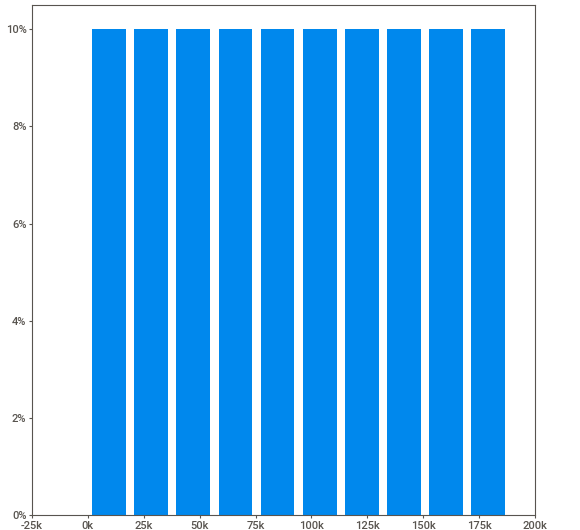
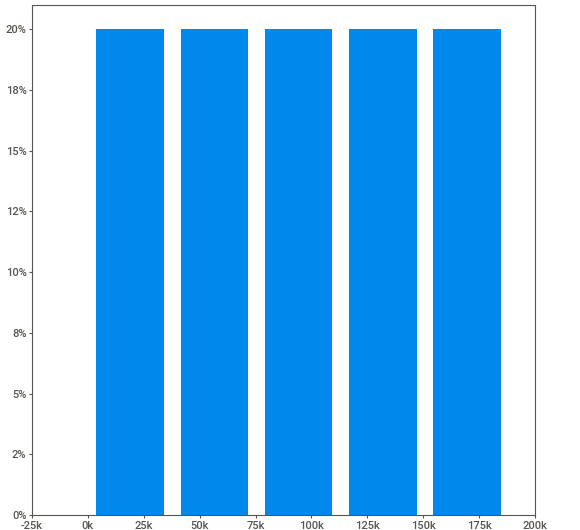
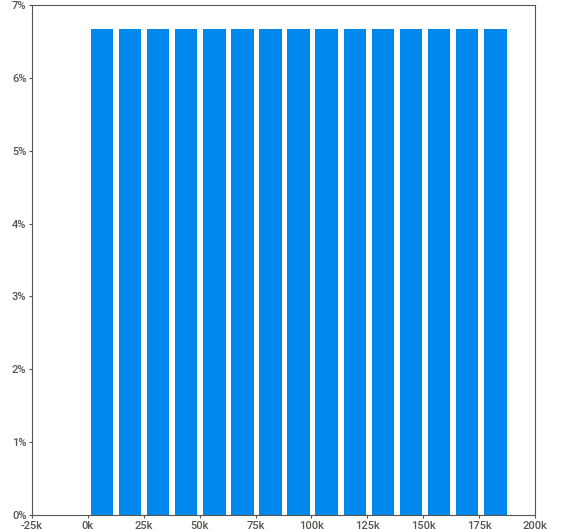
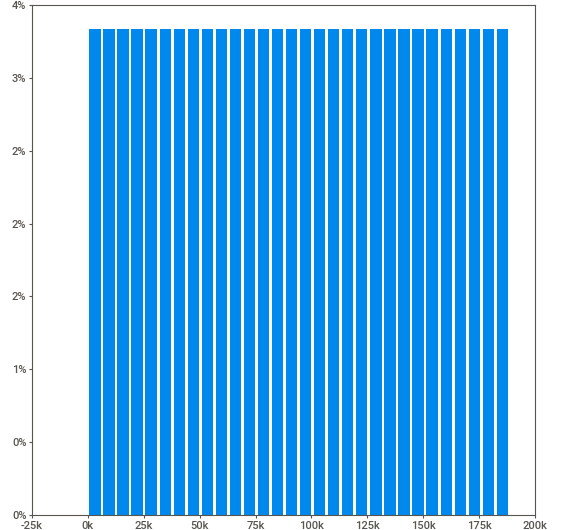
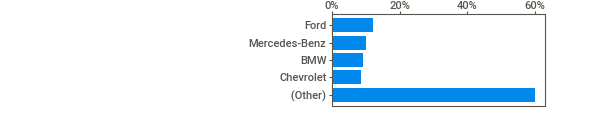
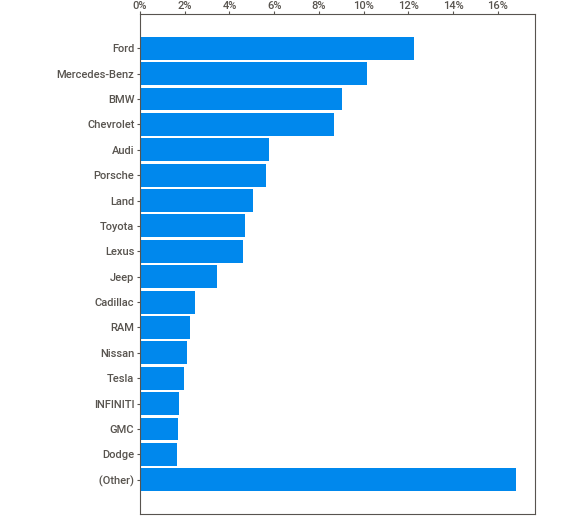
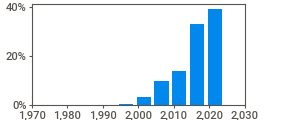
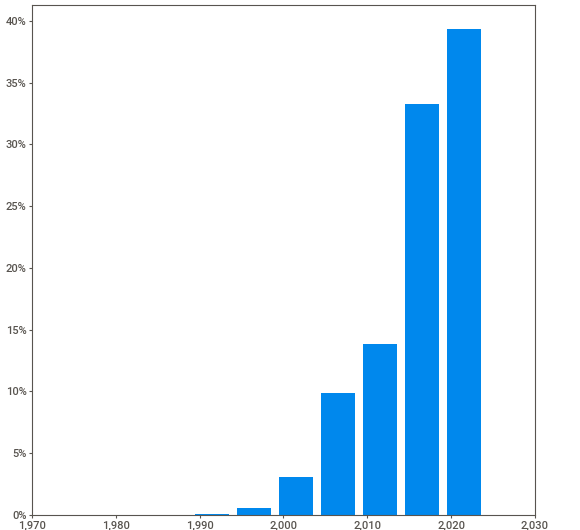
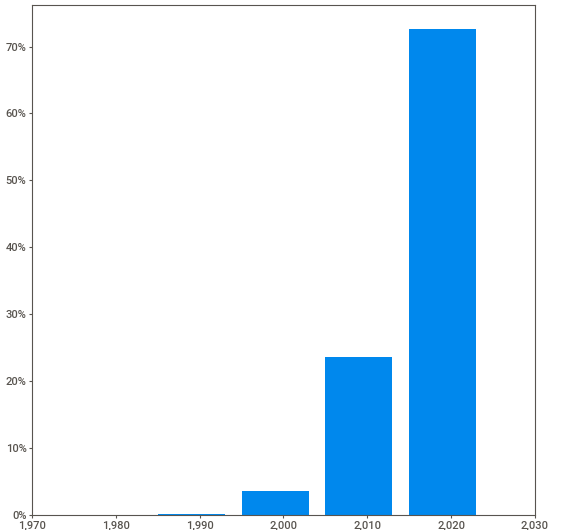
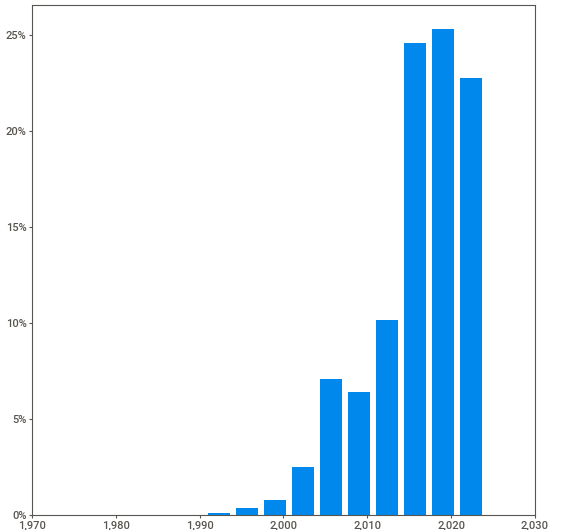
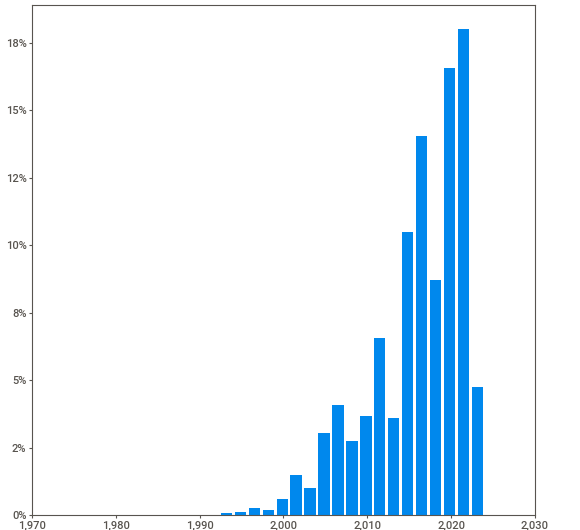
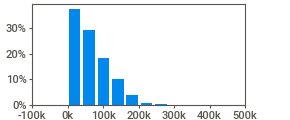
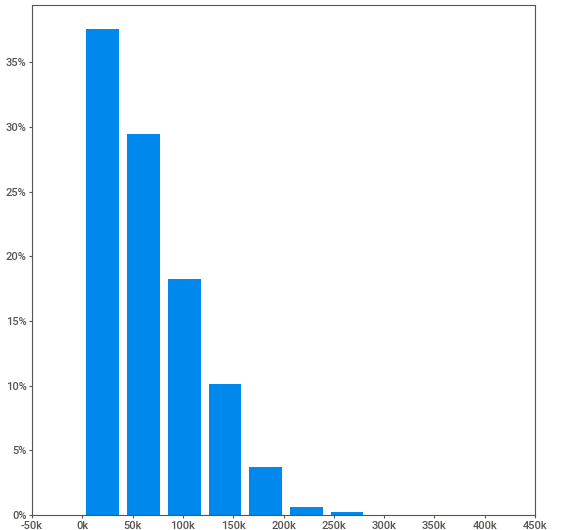
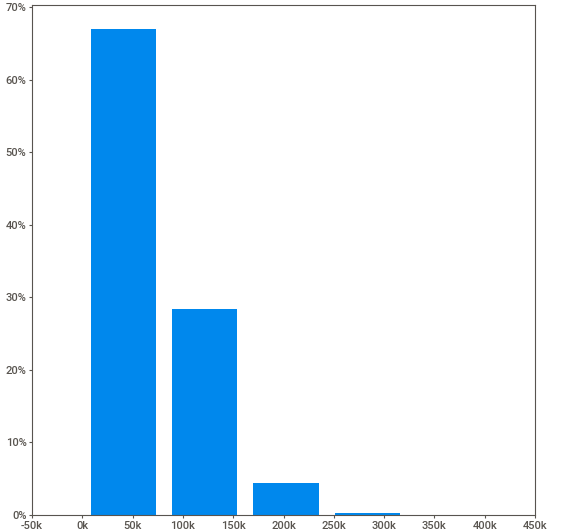
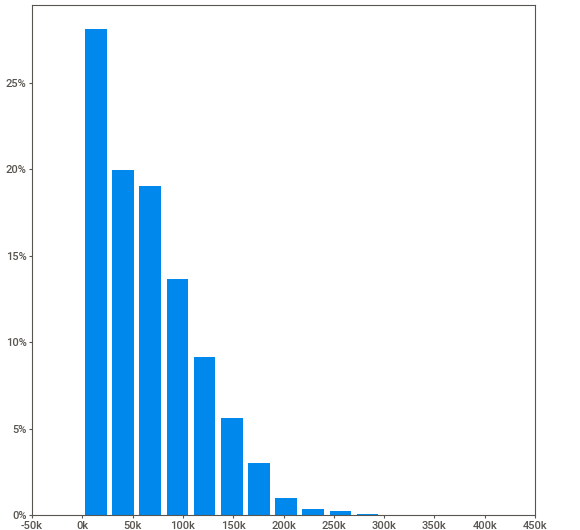
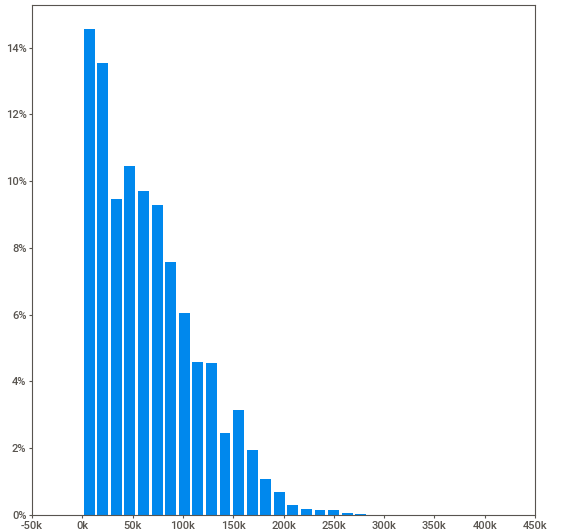
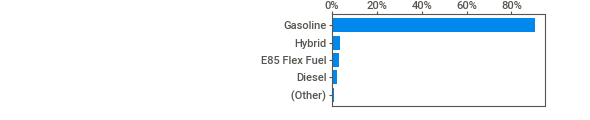
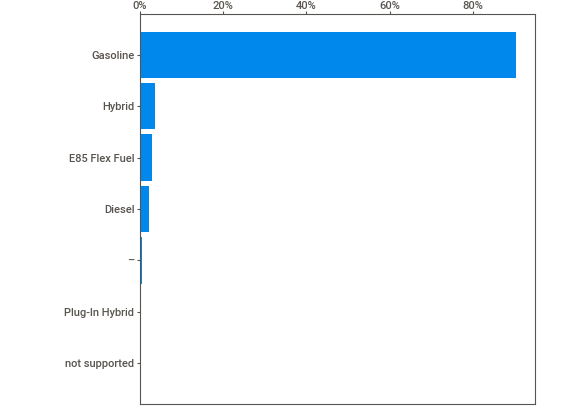
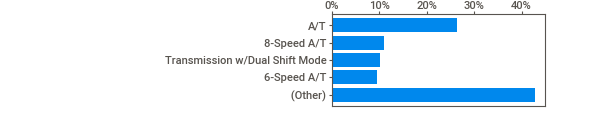
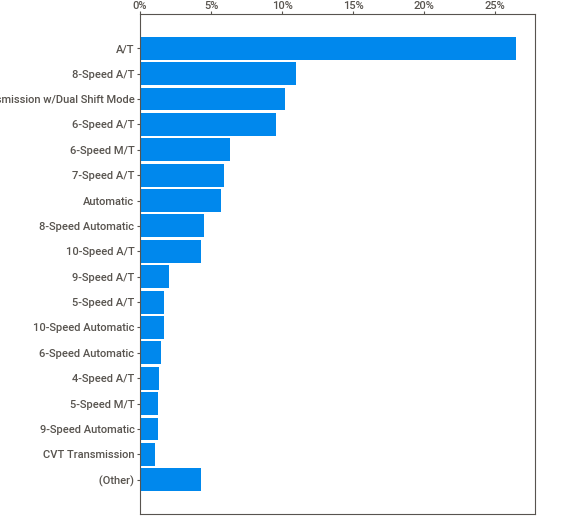
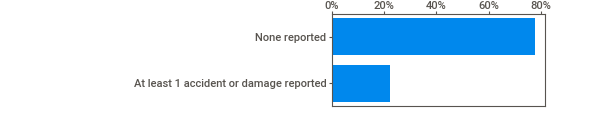
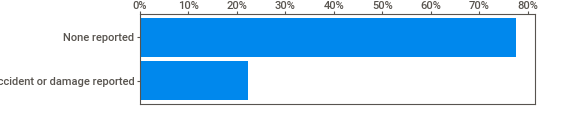
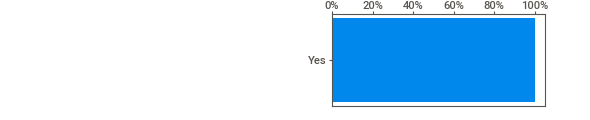
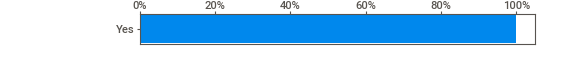
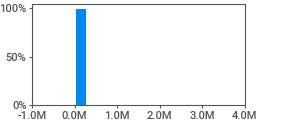
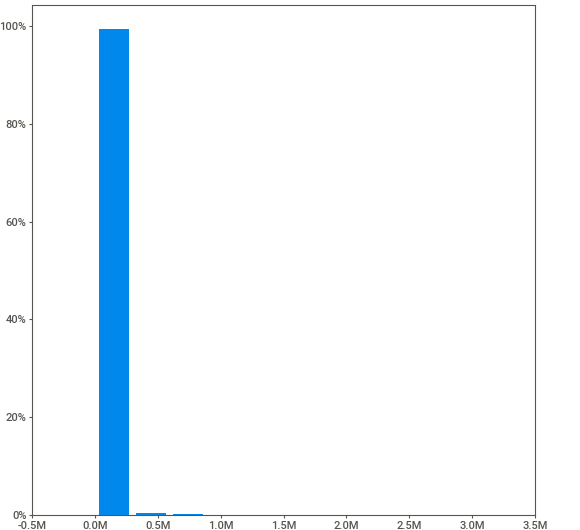
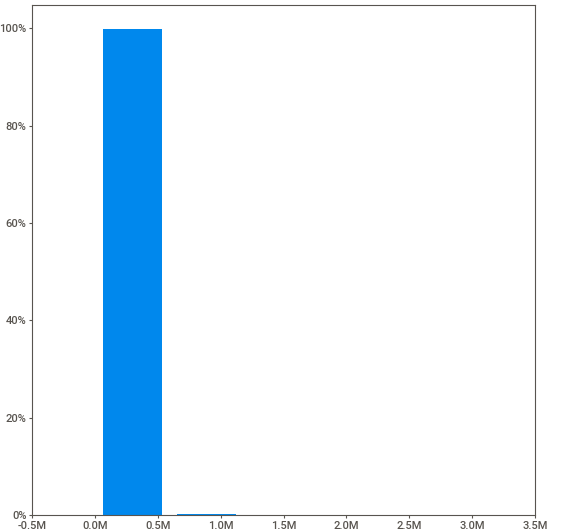
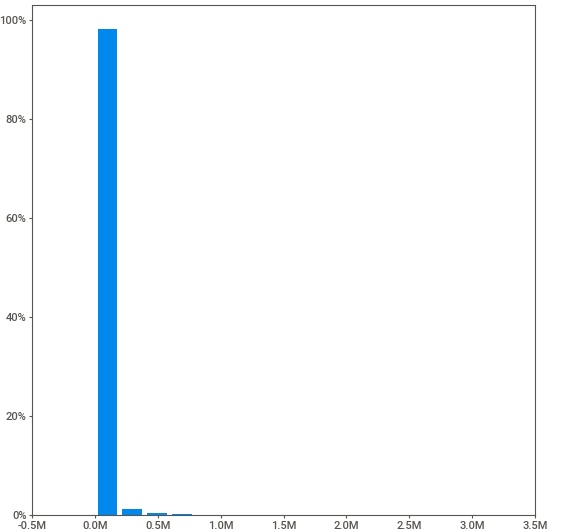
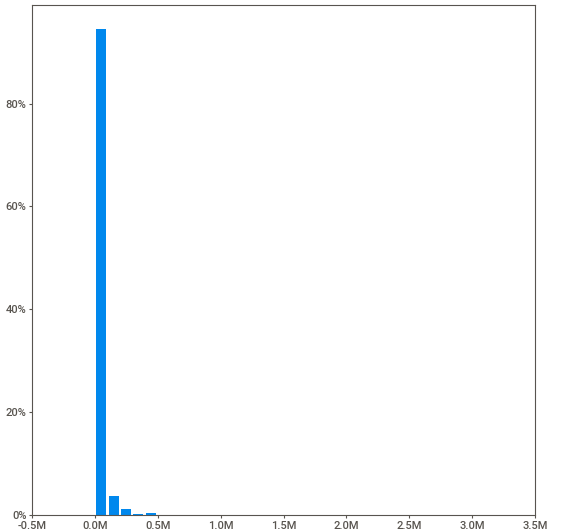
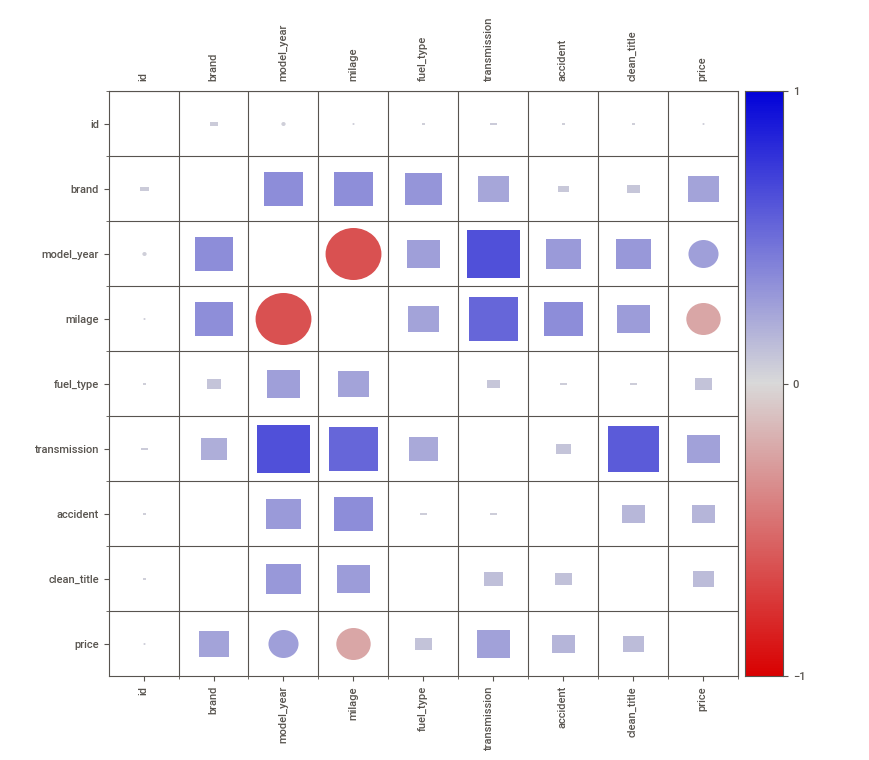
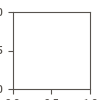

In [23]:
report = sweetviz.analyze(train_df)
report.show_notebook()

In [7]:
train_df.isnull().sum()

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64

In [35]:
train_dropped_df = train_df.dropna()
train_dropped_df

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188527,188527,Chevrolet,Camaro Z28,1999,110000,Gasoline,310.0HP 5.7L 8 Cylinder Engine Gasoline Fuel,A/T,White,Gray,None reported,Yes,14500
188528,188528,Cadillac,Escalade ESV Platinum,2017,49000,Gasoline,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Beige,None reported,Yes,27500
188529,188529,Mercedes-Benz,AMG C 43 AMG C 43 4MATIC,2018,28600,Gasoline,385.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes,30000
188530,188530,Mercedes-Benz,AMG GLC 63 Base 4MATIC,2021,13650,Gasoline,469.0HP 4.0L 8 Cylinder Engine Gasoline Fuel,7-Speed A/T,White,Black,None reported,Yes,86900


In [36]:
train_X_df = train_dropped_df.drop(columns=["price"])
train_y_df = train_dropped_df[["price"]]

In [37]:
pipeline = feature_engine.pipeline.make_pipeline(
    feature_engine.selection.DropFeatures(features_to_drop=["id"]),   
    feature_engine.wrappers.SklearnTransformerWrapper(transformer=sklearn.preprocessing.MinMaxScaler(), variables=["model_year", "milage"]),
    feature_engine.encoding.OrdinalEncoder(encoding_method='arbitrary', variables=["brand", "model", "fuel_type", "engine", "transmission", "ext_col", "int_col", "accident", "clean_title"]),
)

In [38]:
train_X_transformed_df = pipeline.fit_transform(train_X_df)
train_X_transformed_df

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,0,0,0.66,0.525809,0,0,0,0,0,0,0
1,1,1,0.56,0.353544,0,1,0,1,1,1,0
2,2,2,0.56,0.337444,1,2,0,2,0,0,0
3,3,3,0.86,0.047913,0,3,1,3,2,0,0
4,4,4,0.94,0.018000,0,4,2,3,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
188527,2,286,0.50,0.271425,0,305,0,4,0,0,0
188528,8,11,0.86,0.120771,0,11,1,4,1,0,0
188529,4,862,0.88,0.070388,0,220,3,4,2,1,0
188530,4,832,0.94,0.033465,0,16,2,4,2,0,0


In [45]:
price_scaler = sklearn.preprocessing.MinMaxScaler()
train_y_transformed_array = price_scaler.fit_transform(train_y_df)
train_y_transformed_array

array([[0.00074524],
       [0.00101589],
       [0.00403105],
       ...,
       [0.00948483],
       [0.02875935],
       [0.00914439]])

In [46]:
train_joined_df = train_X_transformed_df.copy()
train_joined_df["price"] = train_y_transformed_array
train_joined_df

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,0,0.66,0.525809,0,0,0,0,0,0,0,0.000745
1,1,1,0.56,0.353544,0,1,0,1,1,1,0,0.001016
2,2,2,0.56,0.337444,1,2,0,2,0,0,0,0.004031
3,3,3,0.86,0.047913,0,3,1,3,2,0,0,0.014566
4,4,4,0.94,0.018000,0,4,2,3,1,0,0,0.032350
...,...,...,...,...,...,...,...,...,...,...,...,...
188527,2,286,0.50,0.271425,0,305,0,4,0,0,0,0.004234
188528,8,11,0.86,0.120771,0,11,1,4,1,0,0,0.008638
188529,4,862,0.88,0.070388,0,220,3,4,2,1,0,0.009485
188530,4,832,0.94,0.033465,0,16,2,4,2,0,0,0.028759


In [47]:
regression.setup(train_joined_df, target="price")

,Description,Value
0,Session id,3606
1,Target,price
2,Target type,Regression
3,Original data shape,"(162610, 12)"
4,Transformed data shape,"(162610, 12)"
5,Transformed train set shape,"(113827, 12)"
6,Transformed test set shape,"(48783, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


In [48]:
regression.compare_models(budget_time=1)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0075,0.0006,0.0238,0.1017,0.0192,1.0598,0.4590
ridge,Ridge Regression,0.0075,0.0006,0.0238,0.1017,0.0192,1.0596,0.0320
lar,Least Angle Regression,0.0075,0.0006,0.0238,0.1017,0.0192,1.0598,0.0340
br,Bayesian Ridge,0.0075,0.0006,0.0238,0.1017,0.0192,1.0592,0.0400
rf,Random Forest Regressor,0.0070,0.0006,0.0246,0.0373,0.0201,0.8084,6.7060
omp,Orthogonal Matching Pursuit,0.0093,0.0006,0.0251,-0.0000,0.0206,1.9086,0.0350
lasso,Lasso Regression,0.0093,0.0006,0.0251,-0.0002,0.0206,1.9132,0.2320
en,Elastic Net,0.0093,0.0006,0.0251,-0.0002,0.0206,1.9132,0.0330
llar,Lasso Least Angle Regression,0.0093,0.0006,0.0251,-0.0002,0.0206,1.9132,0.0320
huber,Huber Regressor,0.0080,0.0006,0.0251,-0.0065,0.0207,1.0999,0.5050


LinearRegression(n_jobs=-1)

In [49]:
my_model = regression.create_model("lr")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0076,0.0007,0.0263,0.0832,0.0208,1.0010
1,0.0075,0.0007,0.0259,0.0795,0.0201,1.0763
2,0.0077,0.0006,0.0246,0.0882,0.0198,1.0681
3,0.0070,0.0002,0.0151,0.1957,0.0136,1.0554
4,0.0073,0.0004,0.0199,0.1286,0.0167,1.0275
5,0.0076,0.0006,0.0249,0.0909,0.0199,1.0816
6,0.0077,0.0007,0.0256,0.0861,0.0205,1.0794
7,0.0076,0.0007,0.0259,0.0818,0.0203,1.1177
8,0.0077,0.0007,0.0255,0.0874,0.0207,1.0481


In [50]:
tuned_model = regression.tune_model(my_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0076,0.0007,0.0263,0.0832,0.0208,1.0010
1,0.0075,0.0007,0.0259,0.0795,0.0201,1.0763
2,0.0077,0.0006,0.0246,0.0882,0.0198,1.0681
3,0.0070,0.0002,0.0151,0.1957,0.0136,1.0554
4,0.0073,0.0004,0.0199,0.1286,0.0167,1.0275
5,0.0076,0.0006,0.0249,0.0909,0.0199,1.0816
6,0.0077,0.0007,0.0256,0.0861,0.0205,1.0794
7,0.0076,0.0007,0.0259,0.0818,0.0203,1.1177
8,0.0077,0.0007,0.0255,0.0874,0.0207,1.0481


Fitting 10 folds for each of 2 candidates, totalling 20 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


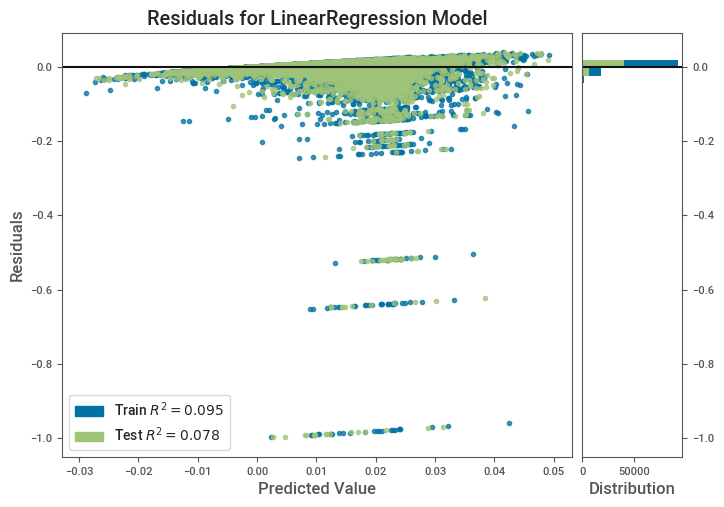

In [51]:
regression.plot_model(tuned_model)

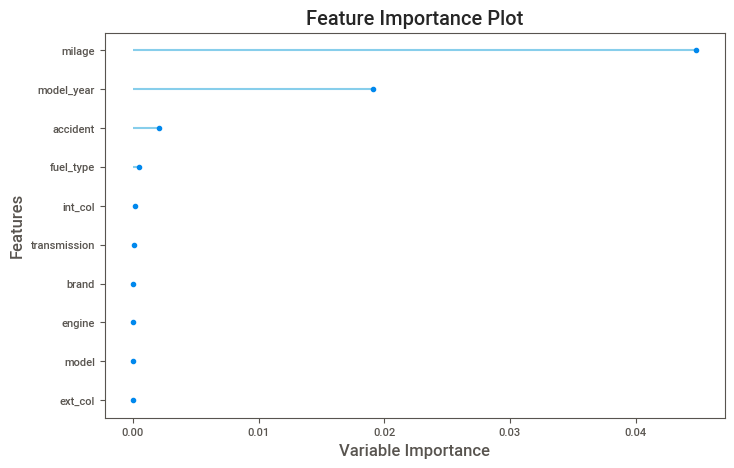

In [52]:
regression.plot_model(tuned_model, plot="feature")

In [53]:
final_model = regression.finalize_model(tuned_model)

In [54]:
test_df = pandas.read_csv("test.csv")
test_df

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,188533,Land,Rover LR2 Base,2015,98000,Gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,None reported,Yes
1,188534,Land,Rover Defender SE,2020,9142,Hybrid,395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,Silver,Black,None reported,Yes
2,188535,Ford,Expedition Limited,2022,28121,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,White,Ebony,None reported,NaN
3,188536,Audi,A6 2.0T Sport,2016,61258,Gasoline,2.0 Liter TFSI,Automatic,Silician Yellow,Black,None reported,NaN
4,188537,Audi,A6 2.0T Premium Plus,2018,59000,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Gray,Black,None reported,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
125685,314218,Mercedes-Benz,GL-Class GL 450 4MATIC,2014,83315,Gasoline,362.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Black,None reported,Yes
125686,314219,Audi,Q7 55 Prestige,2019,29336,Gasoline,3.0 Liter Turbo,Automatic,White,Black,None reported,NaN
125687,314220,Audi,A6 3.0T Premium Plus,2012,77634,Gasoline,333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,A/T,Black,Black,None reported,Yes
125688,314221,Audi,Q7 3.0T Premium,2012,112000,Gasoline,333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,A/T,Black,Black,None reported,Yes


In [55]:
test_df.isnull().sum()

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        3383
engine              0
transmission        0
ext_col             0
int_col             0
accident         1632
clean_title     14239
dtype: int64

In [56]:
test_filled_df = test_df.copy()
test_filled_df["fuel_type"] = test_df["fuel_type"].fillna("Gasoline")
test_filled_df["accident"] = test_df["accident"].fillna("None reported")
test_filled_df["clean_title"] = test_df["clean_title"].fillna("Yes")
test_filled_df

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,188533,Land,Rover LR2 Base,2015,98000,Gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,None reported,Yes
1,188534,Land,Rover Defender SE,2020,9142,Hybrid,395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,Silver,Black,None reported,Yes
2,188535,Ford,Expedition Limited,2022,28121,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,White,Ebony,None reported,Yes
3,188536,Audi,A6 2.0T Sport,2016,61258,Gasoline,2.0 Liter TFSI,Automatic,Silician Yellow,Black,None reported,Yes
4,188537,Audi,A6 2.0T Premium Plus,2018,59000,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Gray,Black,None reported,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
125685,314218,Mercedes-Benz,GL-Class GL 450 4MATIC,2014,83315,Gasoline,362.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Black,None reported,Yes
125686,314219,Audi,Q7 55 Prestige,2019,29336,Gasoline,3.0 Liter Turbo,Automatic,White,Black,None reported,Yes
125687,314220,Audi,A6 3.0T Premium Plus,2012,77634,Gasoline,333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,A/T,Black,Black,None reported,Yes
125688,314221,Audi,Q7 3.0T Premium,2012,112000,Gasoline,333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,A/T,Black,Black,None reported,Yes


In [57]:
test_filled_df.isnull().sum()

id              0
brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
dtype: int64

In [59]:
tmp_df = test_filled_df.copy()
test_transformed_df = pipeline.transform(tmp_df)
test_transformed_df

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,9,299.0,0.82,0.241788,0,29.0,5,4.0,1,0,0
1,9,16.0,0.92,0.022331,2,14.0,3,1.0,2,0,0
2,6,68.0,0.96,0.069205,0,62.0,4,4.0,10,0,0
3,5,5.0,0.84,0.151045,0,680.0,18,263.0,2,0,0
4,5,646.0,0.88,0.145468,0,5.0,0,7.0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...
125685,4,341.0,0.80,0.205520,0,149.0,2,3.0,2,0,0
125686,5,425.0,0.90,0.072205,0,311.0,18,4.0,2,0,0
125687,5,197.0,0.76,0.191489,0,6.0,0,3.0,2,0,0
125688,5,1135.0,0.76,0.276365,0,6.0,0,3.0,2,0,0


In [60]:
predicted_df = regression.predict_model(final_model, test_transformed_df)
predicted_df

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,prediction_label
0,9,299.0,0.82,0.241788,0,29.0,5,4.0,1,0,0,0.009434
1,9,16.0,0.92,0.022331,2,14.0,3,1.0,2,0,0,0.022403
2,6,68.0,0.96,0.069205,0,62.0,4,4.0,10,0,0,0.021202
3,5,5.0,0.84,0.151045,0,680.0,18,263.0,2,0,0,0.019666
4,5,646.0,0.88,0.145468,0,5.0,0,7.0,2,0,0,0.014117
...,...,...,...,...,...,...,...,...,...,...,...,...
125685,4,341.0,0.80,0.205520,0,149.0,2,3.0,2,0,0,0.010798
125686,5,425.0,0.90,0.072205,0,311.0,18,4.0,2,0,0,0.020105
125687,5,197.0,0.76,0.191489,0,6.0,0,3.0,2,0,0,0.010291
125688,5,1135.0,0.76,0.276365,0,6.0,0,3.0,2,0,0,0.005620


In [67]:
submit_df = test_df[["id"]]
tmp_df = predicted_df[["prediction_label"]]
tmp_df.columns = ["price"]
submit_df["price"] = price_scaler.inverse_transform(tmp_df).astype("int")
submit_df

,id,price
0,188533,29850
1,188534,68135
2,188535,64589
3,188536,60055
4,188537,43675
...,...,...
125685,314218,33875
125686,314219,61350
125687,314220,32380
125688,314221,18589


In [68]:
submit_df.to_csv("submit.csv", index=False)